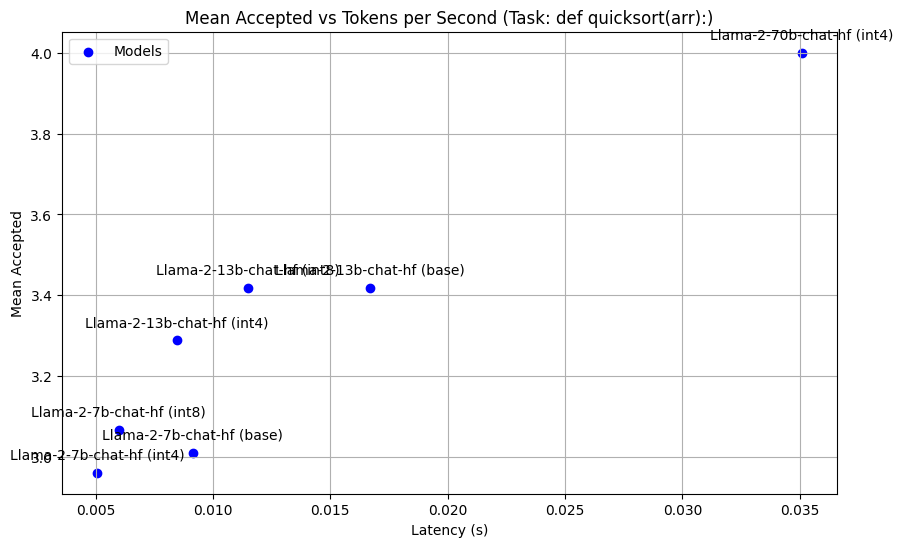

In [130]:
import matplotlib.pyplot as plt

# Provided data
mean_accepted = {
    "Llama-2-7b-chat-hf (int4)": 2.960912052117264,
    "Llama-2-7b-chat-hf (int8)": 3.0677966101694913,
    "Llama-2-7b-chat-hf (base)": 3.0100334448160537,
    "Llama-2-13b-chat-hf (int4)": 3.288256227758007,
    "Llama-2-13b-chat-hf (int8)": 3.4191176470588234,
    "Llama-2-13b-chat-hf (base)": 3.4191176470588234,
    "Llama-2-70b-chat-hf (int4)": 4
}


latency = {
    "Llama-2-7b-chat-hf (int4)": 1/197.05,
    "Llama-2-7b-chat-hf (int8)": 1/167.19,
    "Llama-2-7b-chat-hf (base)": 1/109.45,
    "Llama-2-13b-chat-hf (int4)": 1/118.25,
    "Llama-2-13b-chat-hf (int8)": 1/87.10,
    "Llama-2-13b-chat-hf (base)": 1/59.98,
    "Llama-2-70b-chat-hf (int4)": 1/28.50
}

sd_tokens_per_sec_k4 = {
    "Llama-2-7b-chat-hf (int4)": 53.26,
    "Llama-2-7b-chat-hf (int8)": 55.34,
    "Llama-2-7b-chat-hf (base)": 43.85,
    "Llama-2-13b-chat-hf (int4)": 46.69,
    "Llama-2-13b-chat-hf (int8)": 45.40,
    "Llama-2-13b-chat-hf (base)": 35.32,
    "Llama-2-70b-chat-hf (int4)": 28.50
}

# Extract the model names and values for plotting
model_names = list(mean_accepted.keys())
mean_values = list(mean_accepted.values())
tokens_per_sec_values = [latency[model] for model in model_names]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(tokens_per_sec_values, mean_values, marker='o', color='b', label='Models')

# Add labels and title
plt.xlabel('Latency (s)')
plt.ylabel('Mean Accepted')
plt.title('Mean Accepted vs Tokens per Second (Task: def quicksort(arr):)')

# Add model names as annotations
for i, model_name in enumerate(model_names):
    plt.annotate(model_name, (tokens_per_sec_values[i], mean_values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


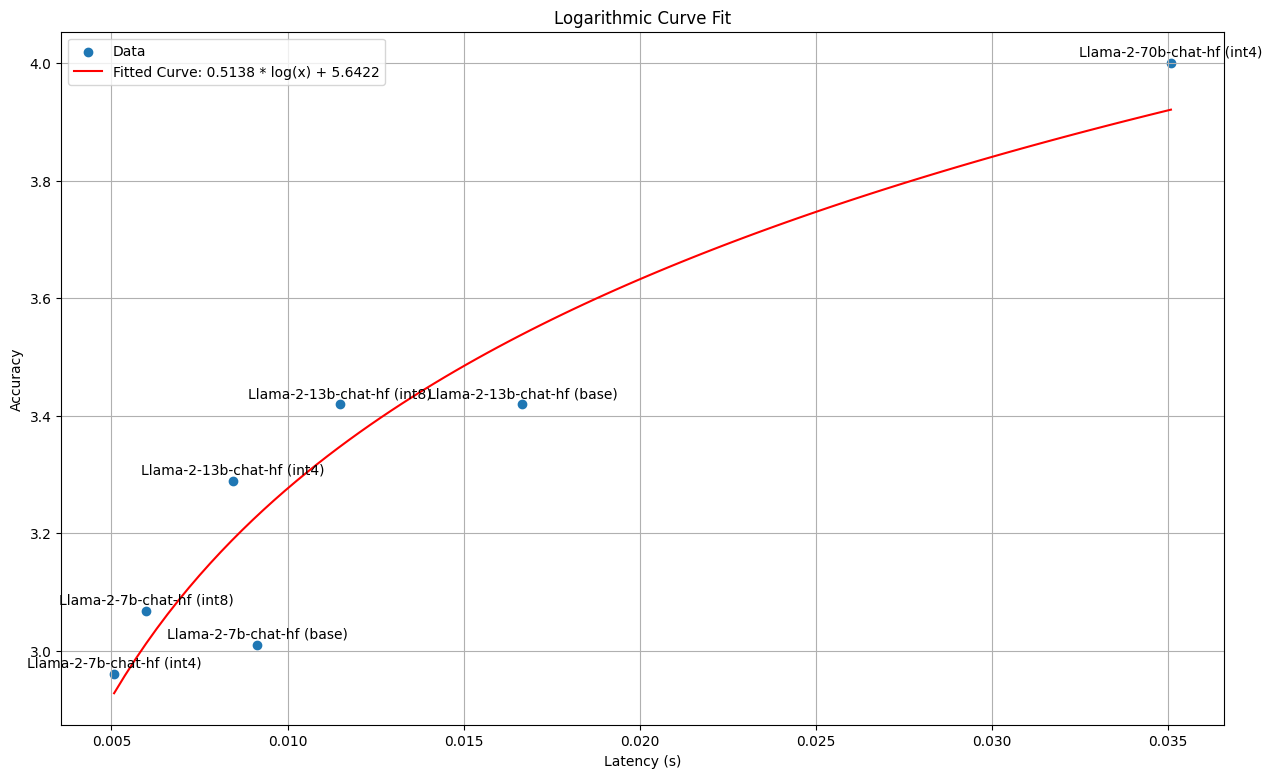

In [132]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the curve function

# Define the sd_latency function
# def sd_latency(a, t):
#     T = 1 / 28.50
#     k = 4
#     return k * t + T + (k - a) * T

def sd_latency(a, t):
    T = 1 / 28.50
    k = 4
    return (k * t + T )/a

# Function to minimize sd_latency for a given t


# # Sweep t in the range 0.005 to 0.035
# result = minimize_scalar(objective_function, bounds=(0.005, 0.035), method='bounded')

# Display the result
# result_minimized_latency = result.fun
# optimal_t = result.x

# result_minimized_latency, optimal_t, curve(optimal_t)


# Convert data to arrays
x_data = np.array(list(latency.values()))
y_data = np.array(list(mean_accepted.values()))

# Define the logarithmic function
def logarithmic_function(x, a, b):
    return a * np.log(x) + b

# Fit the curve to the data
params, covariance = curve_fit(logarithmic_function, x_data, y_data)

# Extract the fitted parameters
a, b = params

# Generate x values for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
# Calculate the corresponding y values
y_fit = logarithmic_function(x_fit, a, b)

plt.figure(figsize=(15, 9))

# Plot the data points and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, label=f'Fitted Curve: {a:.4f} * log(x) + {b:.4f}', color='red')
plt.xlabel('Latency (s)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Logarithmic Curve Fit')
for i, model_name in enumerate(model_names):
    plt.annotate(model_name, (tokens_per_sec_values[i], mean_values[i]), textcoords="offset points", xytext=(0, 5), ha='center')


# Plot the optimal point
# optimal_x = optimal_t
# optimal_y = curve(optimal_t)
# plt.scatter(optimal_x, optimal_y, color='green', label='Optimal Point')
# plt.annotate('Optimal Point', (optimal_x, optimal_y), textcoords="offset points", xytext=(0,5), ha='center')


# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Llama-2-7b-chat-hf (int4) with k = 1 has 0.8892405063291139 average accepted
Llama-2-7b-chat-hf (int4) with k = 2 has 1.6799891844255728 average accepted
Llama-2-7b-chat-hf (int4) with k = 3 has 2.3831549393151454 average accepted
Llama-2-7b-chat-hf (int4) with k = 4 has 3.008438411226442 average accepted
Llama-2-7b-chat-hf (int4) with k = 5 has 3.56446580238807 average accepted
Llama-2-7b-chat-hf (int4) with k = 6 has 4.058907881237493 average accepted
Llama-2-7b-chat-hf (int4) with k = 7 has 4.498585805783973 average accepted
Llama-2-7b-chat-hf (int4) with k = 8 has 4.8895652260294185 average accepted
Llama-2-7b-chat-hf (int4) with k = 9 has 5.237239963652742 average accepted
Llama-2-7b-chat-hf (int4) with k = 10 has 5.546406423374749 average accepted
Llama-2-7b-chat-hf (int8) with k = 1 has 0.8985736925515055 average accepted
Llama-2-7b-chat-hf (int8) with k = 2 has 1.7060083734971532 average accepted
Llama-2-7b-chat-hf (int8) with k = 3 has 2.4315479362486307 average accepted
Llama

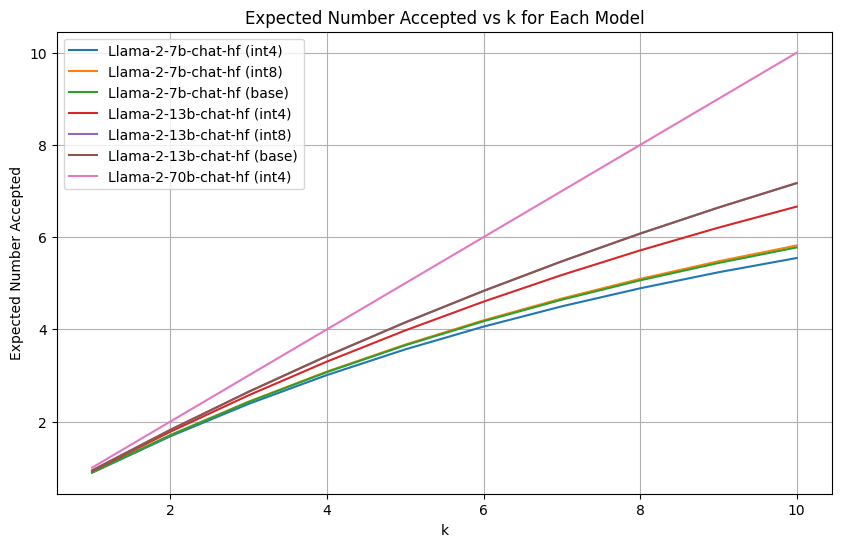

In [114]:
import matplotlib.pyplot as plt

mean_accepted = [
    ("Llama-2-7b-chat-hf (int4)", 0.8892405063291139),
    ("Llama-2-7b-chat-hf (int8)", 0.8985736925515055),
    ("Llama-2-7b-chat-hf (base)", 0.8971518987341772),
    ("Llama-2-13b-chat-hf (int4)", 0.9245585874799358),
    ("Llama-2-13b-chat-hf (int8)", 0.9385113268608414),
    ("Llama-2-13b-chat-hf (base)", 0.9385113268608414),
    ("Llama-2-70b-chat-hf (int4)", 1)
]

plot_data = {model: [] for model, _ in mean_accepted}
mean_accepted_dict = {i:{} for i in range(1,11)}
for model, p in mean_accepted:
    for k in range(1, 11):
        expected_num_accepted = 0.0
        for na in range(1, k + 1):
            if na == k:
                expected_num_accepted += na * (p ** na)
            else:
                expected_num_accepted += na * (p ** na) * ((1 - p))
        plot_data[model].append(expected_num_accepted)
        print(f"{model} with k = {k} has {expected_num_accepted} average accepted")
        mean_accepted_dict[k][model] = expected_num_accepted

# Plotting
plt.figure(figsize=(10, 6))
for model, data in plot_data.items():
    plt.plot(range(1, 11), data, label=model)

plt.xlabel('k')
plt.ylabel('Expected Number Accepted')
plt.title('Expected Number Accepted vs k for Each Model')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
k_list = [3,4,5,6,7,8]
fitted_curve_params = {k_value:None for k_value in k_list}
for k_value in k_list:
    mean_accepted = mean_accepted_dict[k_value]
    # Convert data to arrays
    x_data = np.array(list(latency.values()))
    y_data = np.array(list(mean_accepted.values()))

    # Fit the curve to the data
    params, covariance = curve_fit(logarithmic_function, x_data, y_data)

    # Extract the fitted parameters
    a, b = params
    fitted_curve_params[k_value]=(a,b)


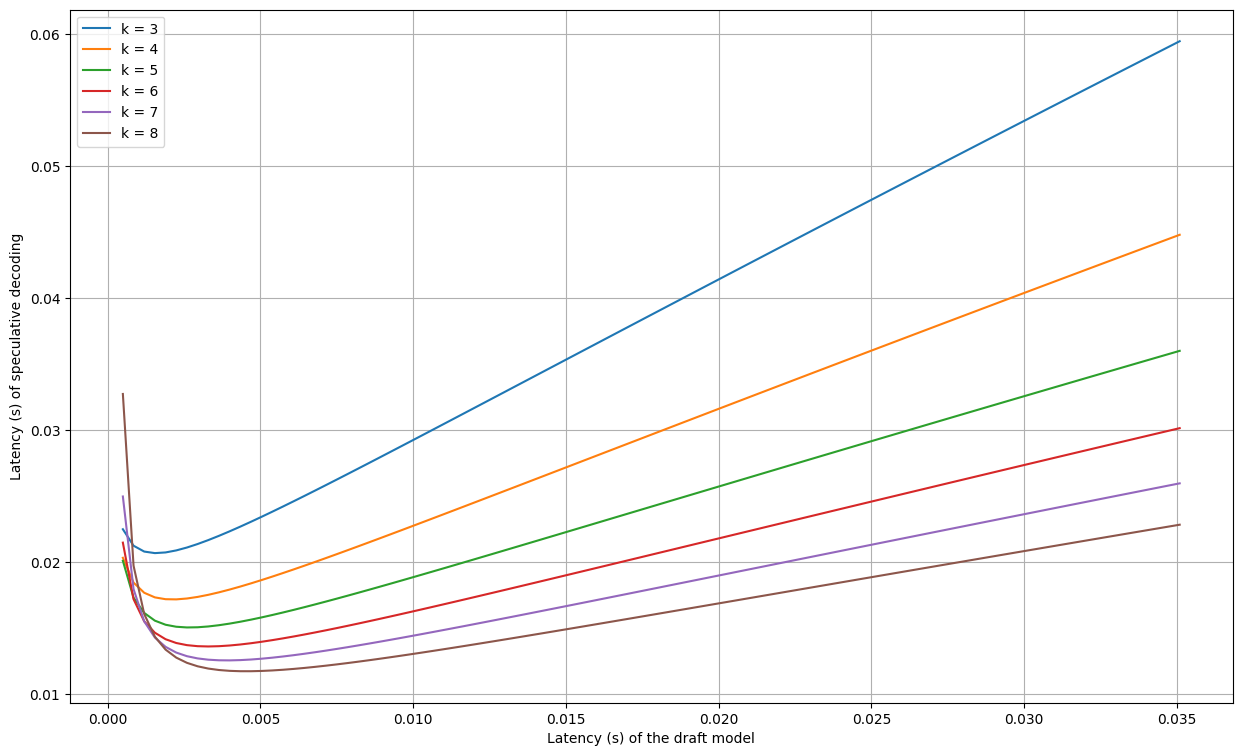

In [141]:
def sd_latency(a, t):
    T = 1 / 28.50
    k = 4
    return (k * t + T )/a

def objective_function(t,a,b):
    accuracy = logarithmic_function(t, a, b)
    return sd_latency(accuracy, t)

# Generate x values for the fitted curve
x_fit = np.linspace(0.0005, max(x_data), 100)
# Calculate the corresponding y values

plt.figure(figsize=(15, 9))
for k_value in k_list:
    a,b = fitted_curve_params[k_value]
    y_fit = objective_function(x_fit, a, b)



    # Plot the data points and the fitted curve
    plt.plot(x_fit, y_fit, label='k = '+str(k_value))
plt.xlabel('Latency (s) of the draft model')
plt.ylabel('Latency (s) of speculative decoding')
plt.legend()


# Show the plot
plt.grid(True)
plt.show()

In [65]:
# Define the curve function
def curve(t):
    return 0.5128 * np.log(t) + 5.6452

# Define the sd_latency function
def sd_latency(a, t):
    T = 1 / 28.50
    k = 4
    return k * t + T + (k - a) * T

# Function to minimize sd_latency for a given t
def objective_function(t):
    a = curve(t)
    return sd_latency(a, t)

t = 0.025
objective_function(t)

0.1437353468094606

In [64]:
t = 0.005
objective_function(t)

0.09269393493213449

In [61]:
t = 0.006
objective_function(t) 

0.09341342635936467

In [62]:
t = 0.007
objective_function(t) 

0.0946397958816307

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the curve function
def curve(t):
    return 0.5128 * np.log(t) + 5.6452

# Define the sd_latency function
def sd_latency(a, t):
    T = 1 / 28.50
    k = 4
    return k * t + T + (k - a) * T

# Function to minimize sd_latency for a given t
def objective_function(t):
    a = curve(t)
    return sd_latency(a, t)

# Sweep t in the range 0.005 to 0.035
result = minimize_scalar(objective_function, bounds=(0.005, 0.035), method='bounded')

# Display the result
result_minimized_latency = result.fun
optimal_t = result.x

result_minimized_latency, optimal_t


(0.09269597831965298, 0.0050050675998422525)

In [43]:
mean_accepted = {
    "Llama-2-7b-chat-hf (int4)": 2.960912052117264,
    "Llama-2-7b-chat-hf (int8)": 3.0677966101694913,
    "Llama-2-7b-chat-hf (base)": 3.0100334448160537,
    "Llama-2-13b-chat-hf (int4)": 3.288256227758007,
    "Llama-2-13b-chat-hf (int8)": 3.4191176470588234,
    "Llama-2-13b-chat-hf (base)": 3.4191176470588234,
    "Llama-2-70b-chat-hf (int4)": 4
}
latency = {
    "Llama-2-7b-chat-hf (int4)": 1/197.05,
    "Llama-2-7b-chat-hf (int8)": 1/167.19,
    "Llama-2-7b-chat-hf (base)": 1/109.45,
    "Llama-2-13b-chat-hf (int4)": 1/118.25,
    "Llama-2-13b-chat-hf (int8)": 1/87.10,
    "Llama-2-13b-chat-hf (base)": 1/59.98,
    "Llama-2-70b-chat-hf (int4)": 1/28.50
}
def curve(t):
    return 0.5128*np.log(t)+5.6452

def sd_latency(a,t):
    T = 1/28.50
    k = 4
    return k*t+T+(k-a)*T

for key in latency.keys():
    print(key)
    # a = curve(latency[key])
    a = mean_accepted[key]
    print(a)
    print(sd_latency(a,latency[key]))

Llama-2-7b-chat-hf (int4)
2.960912052117264
0.09184636193152386
Llama-2-7b-chat-hf (int8)
3.0677966101694913
0.09172148605919785
Llama-2-7b-chat-hf (base)
3.0100334448160537
0.10636975610585075
Llama-2-13b-chat-hf (int4)
3.288256227758007
0.09388782346874838
Llama-2-13b-chat-hf (int8)
3.4191176470588234
0.1013937812722527
Llama-2-13b-chat-hf (base)
3.4191176470588234
0.12215845254231632
Llama-2-70b-chat-hf (int4)
4
0.17543859649122806


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the curve function
def curve(t):
    return 0.5128 * np.log(t) + 5.6452

# Define the sd_latency function
def sd_latency(a, t):
    T = 1 / 28.50
    k = 4
    return k * t + T + (k - a) * T

# Function to minimize sd_latency for a given t
def objective_function(t):
    a = curve(t)
    return sd_latency(a, t)

# Sweep t in the range 0.005 to 0.035
result = minimize_scalar(objective_function, bounds=(0.005, 0.035), method='bounded')

# Display the result
result_minimized_latency = result.fun
optimal_t = result.x

result_minimized_latency, optimal_t, curve(optimal_t)


(0.09269597831965298, 0.0050050675998422525, 2.9287423242719064)

In [37]:
T = 1/28.50
k = 4
t = 0.015
a = 0.5128*np.log(t)+5.6452
func = k*t+T+(k-a)*T
func

0.11292662329602901

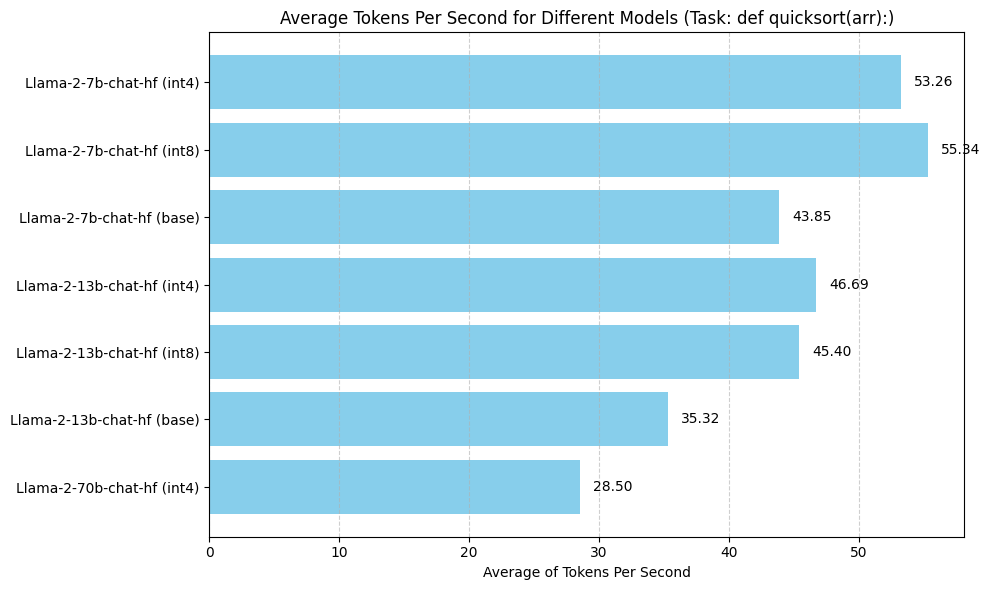

In [23]:
import matplotlib.pyplot as plt

# Provided data
sd_tokens_per_sec_k4 = {
    "Llama-2-7b-chat-hf (int4)": 53.26,
    "Llama-2-7b-chat-hf (int8)": 55.34,
    "Llama-2-7b-chat-hf (base)": 43.85,
    "Llama-2-13b-chat-hf (int4)": 46.69,
    "Llama-2-13b-chat-hf (int8)": 45.40,
    "Llama-2-13b-chat-hf (base)": 35.32,
    "Llama-2-70b-chat-hf (int4)": 28.50
}

# Extract labels and values
labels = list(sd_tokens_per_sec_k4.keys())
values = list(sd_tokens_per_sec_k4.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Average of Tokens Per Second')
plt.title('Average Tokens Per Second for Different Models (Task: def quicksort(arr):)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add values on top of the bars
for i, v in enumerate(values):
    plt.text(v + 1, i, f"{v:.2f}", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


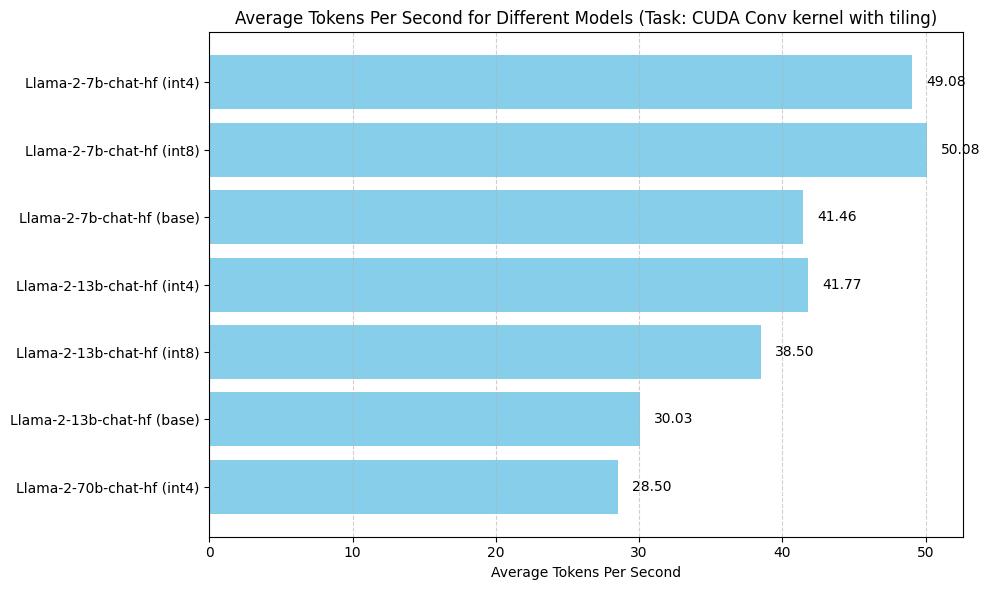

In [24]:
import matplotlib.pyplot as plt

# Provided data
sd_tokens_per_sec_k4 = {
    "Llama-2-7b-chat-hf (int4)": 49.08,
    "Llama-2-7b-chat-hf (int8)": 50.08,
    "Llama-2-7b-chat-hf (base)": 41.46,
    "Llama-2-13b-chat-hf (int4)": 41.77,
    "Llama-2-13b-chat-hf (int8)": 38.50,
    "Llama-2-13b-chat-hf (base)": 30.03,
    "Llama-2-70b-chat-hf (int4)": 28.50
}

# Extract labels and values
labels = list(sd_tokens_per_sec_k4.keys())
values = list(sd_tokens_per_sec_k4.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Average Tokens Per Second')
plt.title('Average Tokens Per Second for Different Models (Task: CUDA Conv kernel with tiling)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add values on top of the bars
for i, v in enumerate(values):
    plt.text(v + 1, i, f"{v:.2f}", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


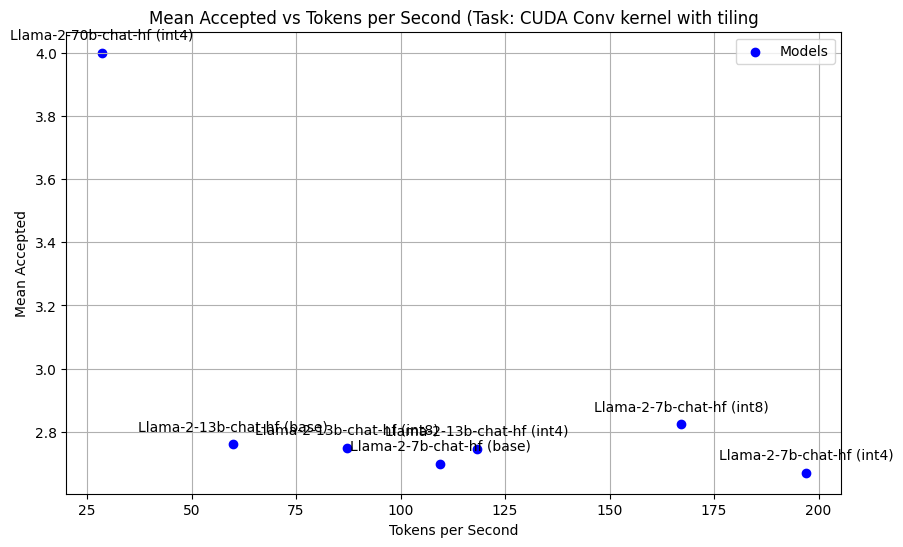

In [4]:
import matplotlib.pyplot as plt

# Provided data
mean_accepted = {
    "Llama-2-7b-chat-hf (int4)": 2.670229007633588,
    "Llama-2-7b-chat-hf (int8)": 2.823529411764706,
    "Llama-2-7b-chat-hf (base)": 2.697388632872504,
    "Llama-2-13b-chat-hf (int4)": 2.7465007776049766,
    "Llama-2-13b-chat-hf (int8)": 2.75,
    "Llama-2-13b-chat-hf (base)": 2.760188087774295,
    "Llama-2-70b-chat-hf (int4)": 4
}

tokens_per_sec = {
    "Llama-2-7b-chat-hf (int4)": 197.05,
    "Llama-2-7b-chat-hf (int8)": 167.19,
    "Llama-2-7b-chat-hf (base)": 109.45,
    "Llama-2-13b-chat-hf (int4)": 118.25,
    "Llama-2-13b-chat-hf (int8)": 87.10,
    "Llama-2-13b-chat-hf (base)": 59.98,
    "Llama-2-70b-chat-hf (int4)": 28.50
}

# Extract the model names and values for plotting
model_names = list(mean_accepted.keys())
mean_values = list(mean_accepted.values())
tokens_per_sec_values = [tokens_per_sec[model] for model in model_names]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(tokens_per_sec_values, mean_values, marker='o', color='b', label='Models')

# Add labels and title
plt.xlabel('Tokens per Second')
plt.ylabel('Mean Accepted')
plt.title('Mean Accepted vs Tokens per Second (Task: CUDA Conv kernel with tiling')

# Add model names as annotations
for i, model_name in enumerate(model_names):
    plt.annotate(model_name, (tokens_per_sec_values[i], mean_values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
